# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
data_df = pd.read_csv('telecom_users.csv', index_col=0, skipinitialspace=True)
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [3]:
data_df.drop(columns={'customerID'}, inplace=True)

In [4]:
data_df.shape

(5986, 20)

In [5]:
data_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5976.000000
mean,0.161377,32.468760,64.802213,2298.060617
std,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,404.312500
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
data_df.describe(include=np.object)

<ipython-input-6-5fc129dc0c45>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_df.describe(include=np.object)


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [7]:
data_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
data_df.isna().sum()
data_df.dropna(inplace=True)
data_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
pd = data_df.groupby('PaymentMethod').count()
pd

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
PaymentMethod,,,,,,,,,,,,,,,,,,,
0,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306
1,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302
2,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
3,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362


    Описание данных: Датафрейм содержит 5986 строк и 21 столбец. Столбец customerID - id клиента можно удалить, т.к. он не влияет на отток клиентов. Количество пропусков в столбце TotalCharges 10, строки с отсутствующими данными можно удалить. Основные статистические показатели для числовых данных: tenure (сколько месяцев человек являлся клиентом компании) всреднем 32 мес., медиана 24 мес., максимальное значение - 72; MonthlyCharges (месячный размер оплаты на настоящий момент) всреднем 65, медиана 30, минимальное значение - 18, максимальное значение - 118; TotalCharges (общая сумма, которую клиент заплатил за услуги за все время) всреднем 2298, медиана 2274, минимальное значение - 18, максимальное значение - 8684.
    Строковые данные:
    Бинарные значения имеют показатели 
    gender – пол клиента (male/female), SeniorCitizen – яляется ли клиент пенсионером (1, 0)
    Partner – состоит ли клиент в браке (Yes, No)
    Dependents – есть ли у клиента иждивенцы (Yes, No)
    PhoneService – подключена ли услуга телефонной связи (Yes, No)
    PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)
    Churn – произошел ли отток (Yes or No).
    3 варианта значений в признаках:
     MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)
     InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)
     OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)
     OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)
     DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)
     TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)
     StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)
     StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)
     Contract – тип контракта клиента (Month-to-month, One year, Two year).
     4 варианта значений имеет признак:
     PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
Целевой признак - Churn – произошел ли отток (Yes or No).

# 2. Исследование зависимостей и формулирование гипотез

In [24]:
#Общий отток клиентов
dt=data_df.groupby('Churn').count()['gender']
dt

Churn
0    4389
1    1587
Name: gender, dtype: int64

In [25]:
#кодирования переменных
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
for col_name in data_df.columns:
    if(data_df[col_name].dtype == 'object'):
        data_df[col_name] = labelencoder.fit_transform(data_df[col_name])

In [26]:
data_df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [27]:
columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

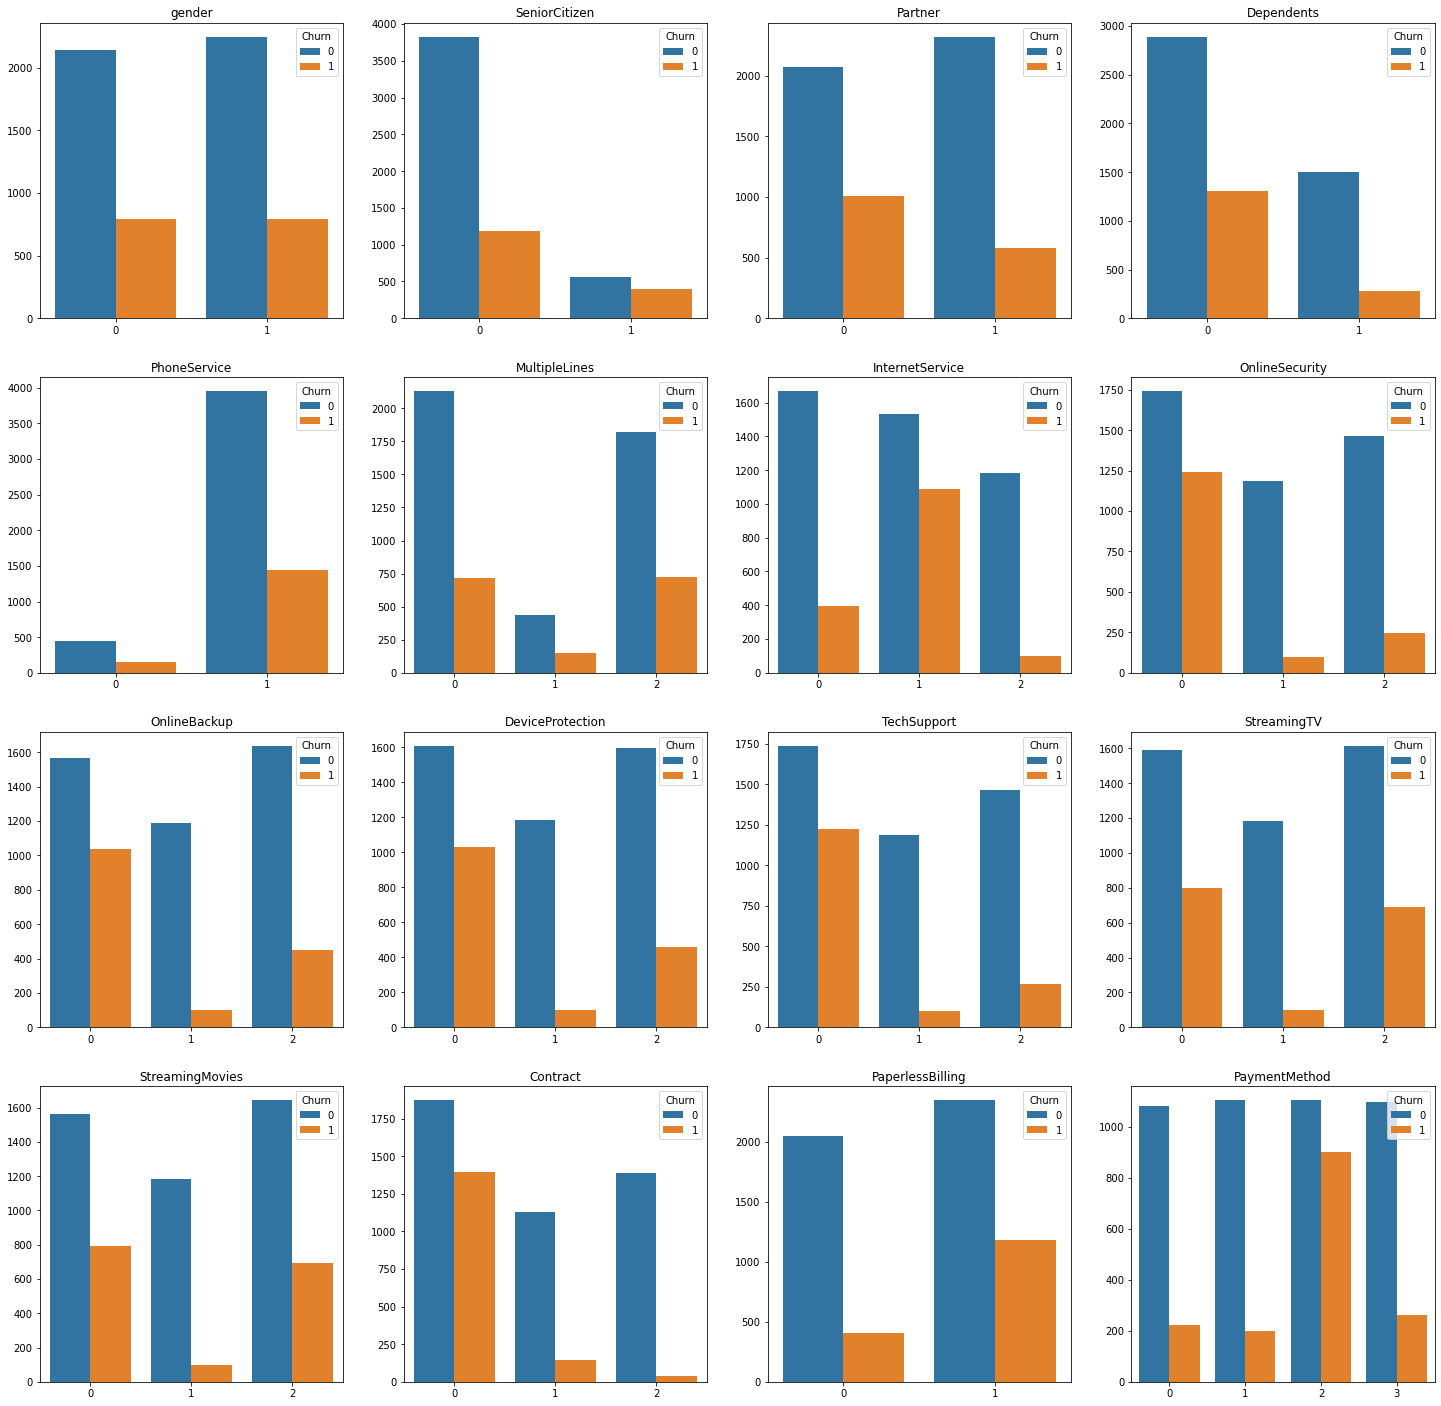

In [28]:
# Отток клиентов в разрезе категориальных и бинарных признаков
import warnings
warnings.filterwarnings('ignore')
# Создание основных объектов диаграммы
fig, axes = plt.subplots(4, 4, figsize=(25, 25))

# Построение связи признаков с оттоком клиентов
for column, ax in zip(columns, axes.flat):
    sns.countplot(column, hue='Churn', data=data_df, ax=ax).set_title(column)
    ax.legend(loc='upper right', title='Churn')
    
# Оформление диаграммы
plt.setp(axes, xlabel=None, ylabel=None)

# Вывод диаграммы
plt.show()

    Из диаграмм видно, что все признаки, за исключением Gender, PhoneService, MultipleLines, StreamingTV и StreamingMovies имеют линейную связь с оттоком клиентов.

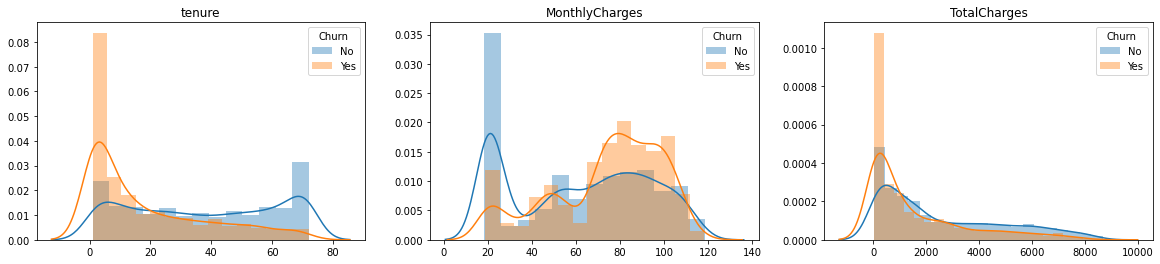

In [29]:
# Создание основных объектов диаграммы
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# Построение диаграмм распределения случайных величин
for column, ax in zip(['tenure', 'MonthlyCharges', 'TotalCharges'], axes.flat):
    sns.distplot(data_df.query('Churn==0')[column], label='No', ax=ax).set_title(column)
    sns.distplot(data_df.query('Churn==1')[column], label='Yes', ax=ax).set_title(column)
    ax.legend(loc='upper right', title='Churn')

# Оформление диаграммы
plt.setp(axes, xlabel=None, ylabel=None)

# Вывод диаграмм
plt.show()

    Признаки Tenure и TotalCharges представлены усеченной формой распределения, с резким снижением частот, признак MonthlyCharges представлен бимодальной гистограммой, возможно выделение двух групп клиентов.   
    В признаке Tenure прослеживается четкая зависимость между увеличением количества месяцев, на протяжении которых человек является клиентом, и уменьшением оттока клиентов. Также присутствует обратная связь между размером ежемесячного платежа и оттоком.
    Аномальные значения вероятностей, которые могли бы искажать распределения, отсутствуют. Из полученных диаграмм видно, что признаки Tenure, MonthlyCharges, TotalCharges имеют характер распределения близкий к нормальному.

    Построим матрицу рассеивания: признаки TotalCharges, Tenure и MonthlyCharges имеют достаточно высокий характер силы связи.

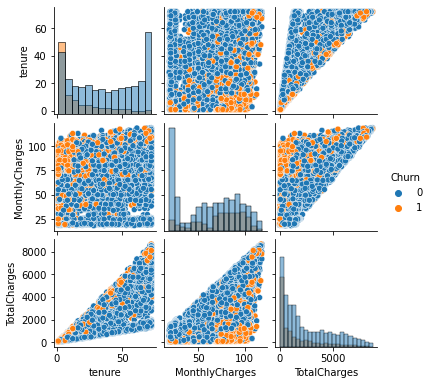

In [30]:
data_df1=data_df[['tenure', 'MonthlyCharges', 'TotalCharges','Churn']]
sns.pairplot(data_df1, hue='Churn', diag_kind='hist', height=1.8)
plt.show()

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

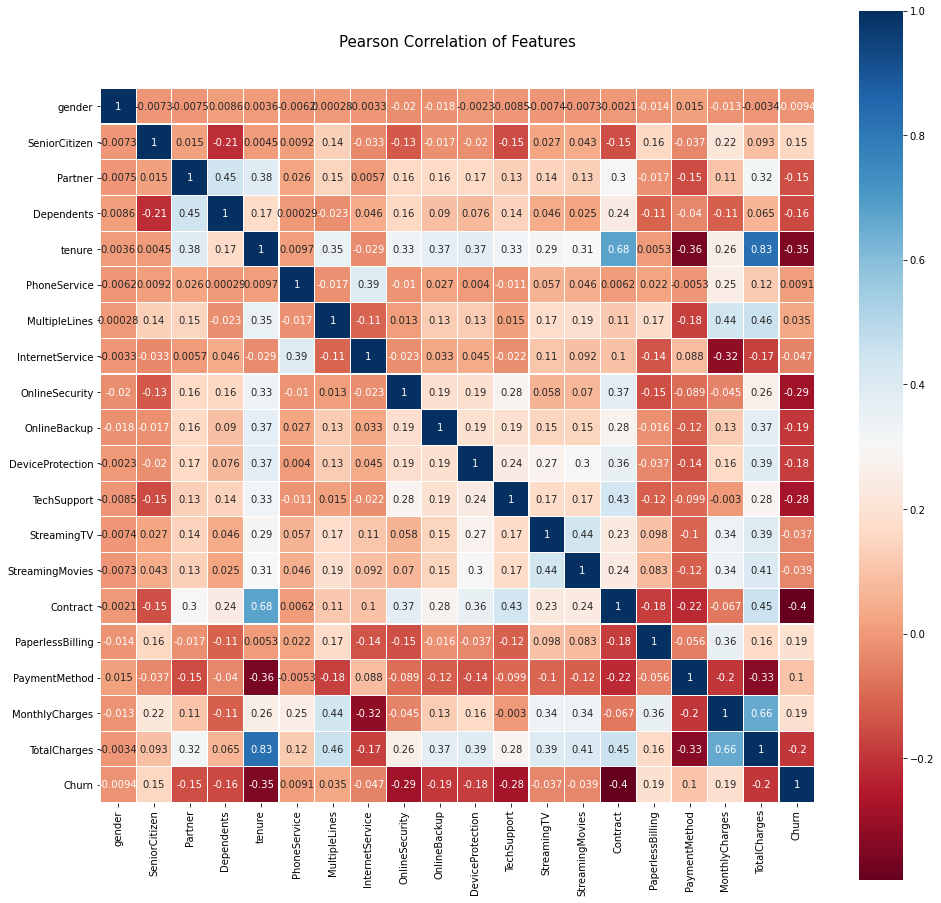

In [31]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

    С помощью матрицы корреляции проведем оценку степени линейной зависимости между признаками. В соответствии с полученной матрицей корреляции можно сказать, что в результате применения бинарного кодирования к категориальным значениям, полученный набор признаков содержит лишние признаки. То есть шесть идентичных признаков: OnlineSecurity_NoIS, OnlineBackup_NoIS, DeviceProtection_NoIS, TechSupport_NoIS, StreamingTV_NoIS, StreamingMovies_NoIS можно удалить, т. к. они полностью дублируют информацию, отраженную в признаке InternetService_No. Также наличие признака MultipleLines_NoPS является лишним, поскольку признаки MultipleLines_NoPS и PhoneService_Yes взаимоисключающие.
    В заключение можно сказать, что, как и ранее предполагали в анализе категориальных признаков, влияние признаков Gender, PhoneService, MultipleLines, StreamingTV и StreamingMovies на отток клиентов минимально. 
    В результате проведенного анализа были определены какие признаки больше всего могут оказывать влияние на отток клиентов, которые в последующем будут использованы для прогнозирования целевой переменной.

Cформулируем ряд предположений:

Между выявленными признаками и оттоком клиентов существует линейная зависимость, которая позволит прогнозировать поведение клиентов с достаточной точностью;
Подтвердим гипотезу об отсутствии влияния признаков Gender_Male, PhoneService_Yes, StreamingTV_Yes и StreamingMovies_Yes на отток;
Модель с лучшим определением групп высокого риска оттока предпочтительнее, чем модель с большим охватом.

# 3. Построение моделей для прогнозирования оттока

In [32]:
# Определение тренировочной и контрольной выборок , train_size=0.3,
x = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=17)


In [33]:
# Определение значимых признаков для прогноза целевой переменной
rfe_model = RFE(RandomForestClassifier(max_depth=3), 12).fit(X_train, y_train)

# Вывод признаков
print(data_df.iloc[:, :-1].columns[rfe_model.support_].tolist())

['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [34]:
# Удаление слабых признаков из анализа
X_train = X_train[:, rfe_model.support_]
X_test = X_test[:, rfe_model.support_]

In [35]:
# Нормализация значений признаков
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)
X_test.shape

(1494, 12)

    Используем Логистическую регрессию, Классификатор градиентного бустинга, Метод К-ближайших соседей, Байесовский классификатор, Метод опорных векторов, Случайный лес, Градиентный бустинг с целью определения лучшего алгоритма для прогноза оттока клиентов. В качестве метрики оценки алгоритма выберем показатель Recall (полнота), т.к. важно не упустить клиентов, которые на самом деле уйдут, то есть свести к минимуму ложноотрицательные прогнозы моделей и будем ориентироваться на метрику полноты (Recall).  
  

In [36]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
# Определение базовых алгоритмов машинного обучения
models = [LogisticRegression(random_state=17),
          GradientBoostingClassifier(random_state=17),
          KNeighborsClassifier(), 
          GaussianNB(), 
          SVC(random_state=17), 
          RandomForestClassifier(n_jobs=-1, random_state=17), 
          XGBClassifier(n_jobs=-1, random_state=17)]
# Список метрик качества алгоритмов
scores = []
scores1 = []
# Поиск подходящего базового алгоритма машинного обучения
for n, model in enumerate(models):
    scores.append(cross_val_score(model, X_train, y_train, scoring='recall', cv=10, n_jobs=-1).mean())
    scores1.append(cross_val_score(model, X_train, y_train, scoring='precision', cv=10, n_jobs=-1).mean())
    #params.append(model.params)
# Список наименований базовых алгоритмов
names = ['Логистическая регрессия','Градиентный бустинг','Метод К-ближайших соседей', 'Байесовский классификатор', 
         'Метод опорных векторов', 'Случайный лес', 'XGB бустинг']

# Вывод метрик качества базовых алгоритмов
a = pd.DataFrame({'Полнота': scores,'Точность': scores1},index=names)
a

,Полнота,Точность
Логистическая регрессия,0.523529,0.635152
Градиентный бустинг,0.514286,0.653103
Метод К-ближайших соседей,0.497479,0.581003
Байесовский классификатор,0.745378,0.527433
Метод опорных векторов,0.489916,0.647089
Случайный лес,0.493277,0.617496
XGB бустинг,0.500000,0.601182


Из полученных результатов видно, что лучший результат Полноты показала Байесовский классификатор с показателем Recall=0.745378. 
Нибольшую точность показал Градиентный бустинг precision = 0.653103.
Попробуем рассмотреть XGB бустинг, оптимизируем его под задачу прогнозирования оттока клиентов. 
Настройку гиперпараметров модели реализуем через сеточный поиск с оценкой по метрике Recall.

In [41]:
#1.XGB бустинг
#params = {'n_estimators': np.arange(10, 100, 10),
#           'max_depth': np.arange(2, 10, 2),
#           'learning_rate': np.arange(0.1, 0.6, 0.1)}
params = {'learning_rate': [0.30000000000000004], 
          'max_depth': [6],
          'n_estimators': [20]}

# Определение алгоритма модели машинного обучения
model = XGBClassifier(n_jobs=-1, random_state=17)

# Поиск оптимальных параметров модели машинного обучения
xgb_model = GridSearchCV(model, params, scoring='recall', cv=10, n_jobs=-1).fit(X_train, y_train)
#Лучшие параметры Градиентного бустинга
xgb_model.best_params_

[18:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.30000000000000004, 'max_depth': 6, 'n_estimators': 20}

In [42]:
# Вывод метрики качества модели
pd.DataFrame({'Recall': xgb_model.best_score_}, index=['XGB бустинг'])

,Recall
XGB бустинг,0.535294


В соответствии с полученной метрикой качества модели машинного обучения можно сказать, что настроенный XGB бустинг
(Recall = 0.535294) менее эффективен, чем Байесовский классификатор (Recall = 0.745378).

Далее рассчитаем эффективность модели на Стекинге и сравним с метрикой качества Градиентного бустинга, Байесовского классификатора.

In [43]:
from sklearn.ensemble import StackingClassifier
estimators = [('lr', LogisticRegression()),
              ('gbc', GradientBoostingClassifier(random_state=17)),
              ('knc', KNeighborsClassifier()),
              ('gnb', GaussianNB()),
              ('svc', SVC(random_state=17)),
              ('rfc', RandomForestClassifier(n_jobs=-1, random_state=17))]
final_estimator = XGBClassifier(n_estimators=50, learning_rate=0.2, max_depth=4,random_state=17)
reg = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
recall_score(y_train, y_pred)

[18:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5747899159663865

Полученный результат метрики качества Стекинга (Recall = 0.5747899) оказался лучше метрики XGB бустинг (Recall = 0.537815).

# 4. Сравнение качества моделей 

Выберем для сравнения качества моделей 3 модели:

Байесовский классификатор (Recall = 0.745378);
XGB бустинг (Recall = 0.537815);
Стекинг (Recall = 0.5747899).
Основной задачей является прогноз ухода клиентов, поэтому мы выполняли расчет и сравнение оценок моделей по метрике "полнота" (Recall). Полнота позволит свести к минимуму ложноотрицательные прогнозы и не упустить клиентов, которые на самом деле могут уйти. 



In [44]:
# Определение модели машинного обучения
gnb_model = GaussianNB().fit(X_train, y_train)

# Расчет прогноза моделей
gnb_predict = gnb_model.predict(X_test)
xgb_predict = xgb_model.predict(X_test)
y_pred = reg.predict(X_test)

# Вывод метрик качества моделей
pd.DataFrame({'AUC': [roc_auc_score(y_test, gnb_predict), roc_auc_score(y_test, xgb_predict), roc_auc_score(y_test, y_pred)], 
              'Recall': [recall_score(y_test, gnb_predict), recall_score(y_test, xgb_predict), recall_score(y_test, y_pred)],
              'Precision': [precision_score(y_test, gnb_predict), precision_score(y_test, xgb_predict), precision_score(y_test, y_pred)]}, 
             index=['Байесовский классификатор', 'XGB бустинг', 'Стекинг'])

,AUC,Recall,Precision
Байесовский классификатор,0.725372,0.707809,0.499112
XGB бустинг,0.691917,0.488665,0.627832
Стекинг,0.694328,0.496222,0.625397


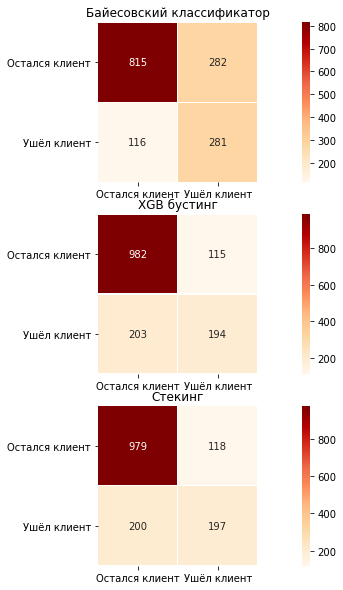

In [45]:
# Определение размера диаграмм
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

# Список целевых переменных предсказанных моделями
y_predicts = [gnb_predict, xgb_predict, y_pred]

# Список наименований моделей
name_models = ['Байесовский классификатор', 'XGB бустинг', 'Стекинг']

# Вывод матриц ошибок
for ax, y_predict, name in zip(axes.flat, y_predicts, name_models):
    sns.heatmap(
        confusion_matrix(y_test, y_predict), cmap='OrRd', square=True, 
        linewidths=0.1, linecolor='white', annot=True, fmt='d', 
        xticklabels=['Остался клиент', 'Ушёл клиент'], 
        yticklabels=['Остался клиент', 'Ушёл клиент'],
        ax=ax
    ).set_title(name)

# Вывод диаграмм
plt.show()

    Из результатов сравнения моделей видно, что Байесовский классификатор превосходит остальные алгоритмы по показателю полноты (Recall). При 397 фактических случаев ухода клиентов, 281 оказались правильными. По показателю точности (Precision) лучше себя показал Стекинг. Хотя по показателю полноты Наивный байесовский классификатор превосходит Градиентный бустинг и Стекинг, по точности им уступает. Если не затрагивать вопрос интерпретируемости полученных результатов, выбор очевиден - Байесовский классификатор, поскольку производит лучший охват в прогнозе оттока клиентов.


Результаты и выводы
    
Предположение о высокой степени связи признаков Tenure, MonthlyCharges, TotalCharges с целевой переменной подтвердилось.
Также подтвердилась гипотеза об отсутствии влияния признаков Gender_Male, PhoneService_Yes, StreamingTV_Yes, StreamingMovies_Yes на отток клиентов;
Предсказывая отток, Компании важно не упустить клиентов, которые на самом деле уйдут, то есть свести к минимуму ложноотрицательные прогнозы моделей и ориентироваться на метрику полноты (Recall). Наивный байесовский классификатор превзошел остальные модели с показателем 0.707809. По показателю полноты данную модель будем считать лучшей.   